## Supervised/Umsupervised/Half-supervised dimension reduction through UMAP.
## Comparation with Stim map is possible here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.io import arff
import pandas as pd
from My_Wheels.Kill_Cache import kill_all_cache

wp = r'D:\ZR\_Codes\2P_Analysis\_Projects\230412_UMAP_Learning'
conda_folder = r'C:\ProgramData\anaconda3\envs\umapzr'

kill_all_cache(conda_folder)
mnist = np.array(pd.DataFrame(arff.loadarff(wp+'\Fashion-MNIST.arff')[0]))
mnist_data = mnist[:,:-1]
mnist_label = mnist[:,-1].astype('i4')


Total 1274 cache folder killed.


In [2]:
# seperate data into train and test.
train, train_labels = mnist_data[:60000],mnist_label[:60000]
test, test_labels = mnist_data[60000:],mnist_label[60000:]
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

## First, Traditional unsupervised learning.

In [3]:
import umap
embedding = umap.UMAP(n_neighbors=5).fit_transform(data)
# neighbors = 5 means very local information.

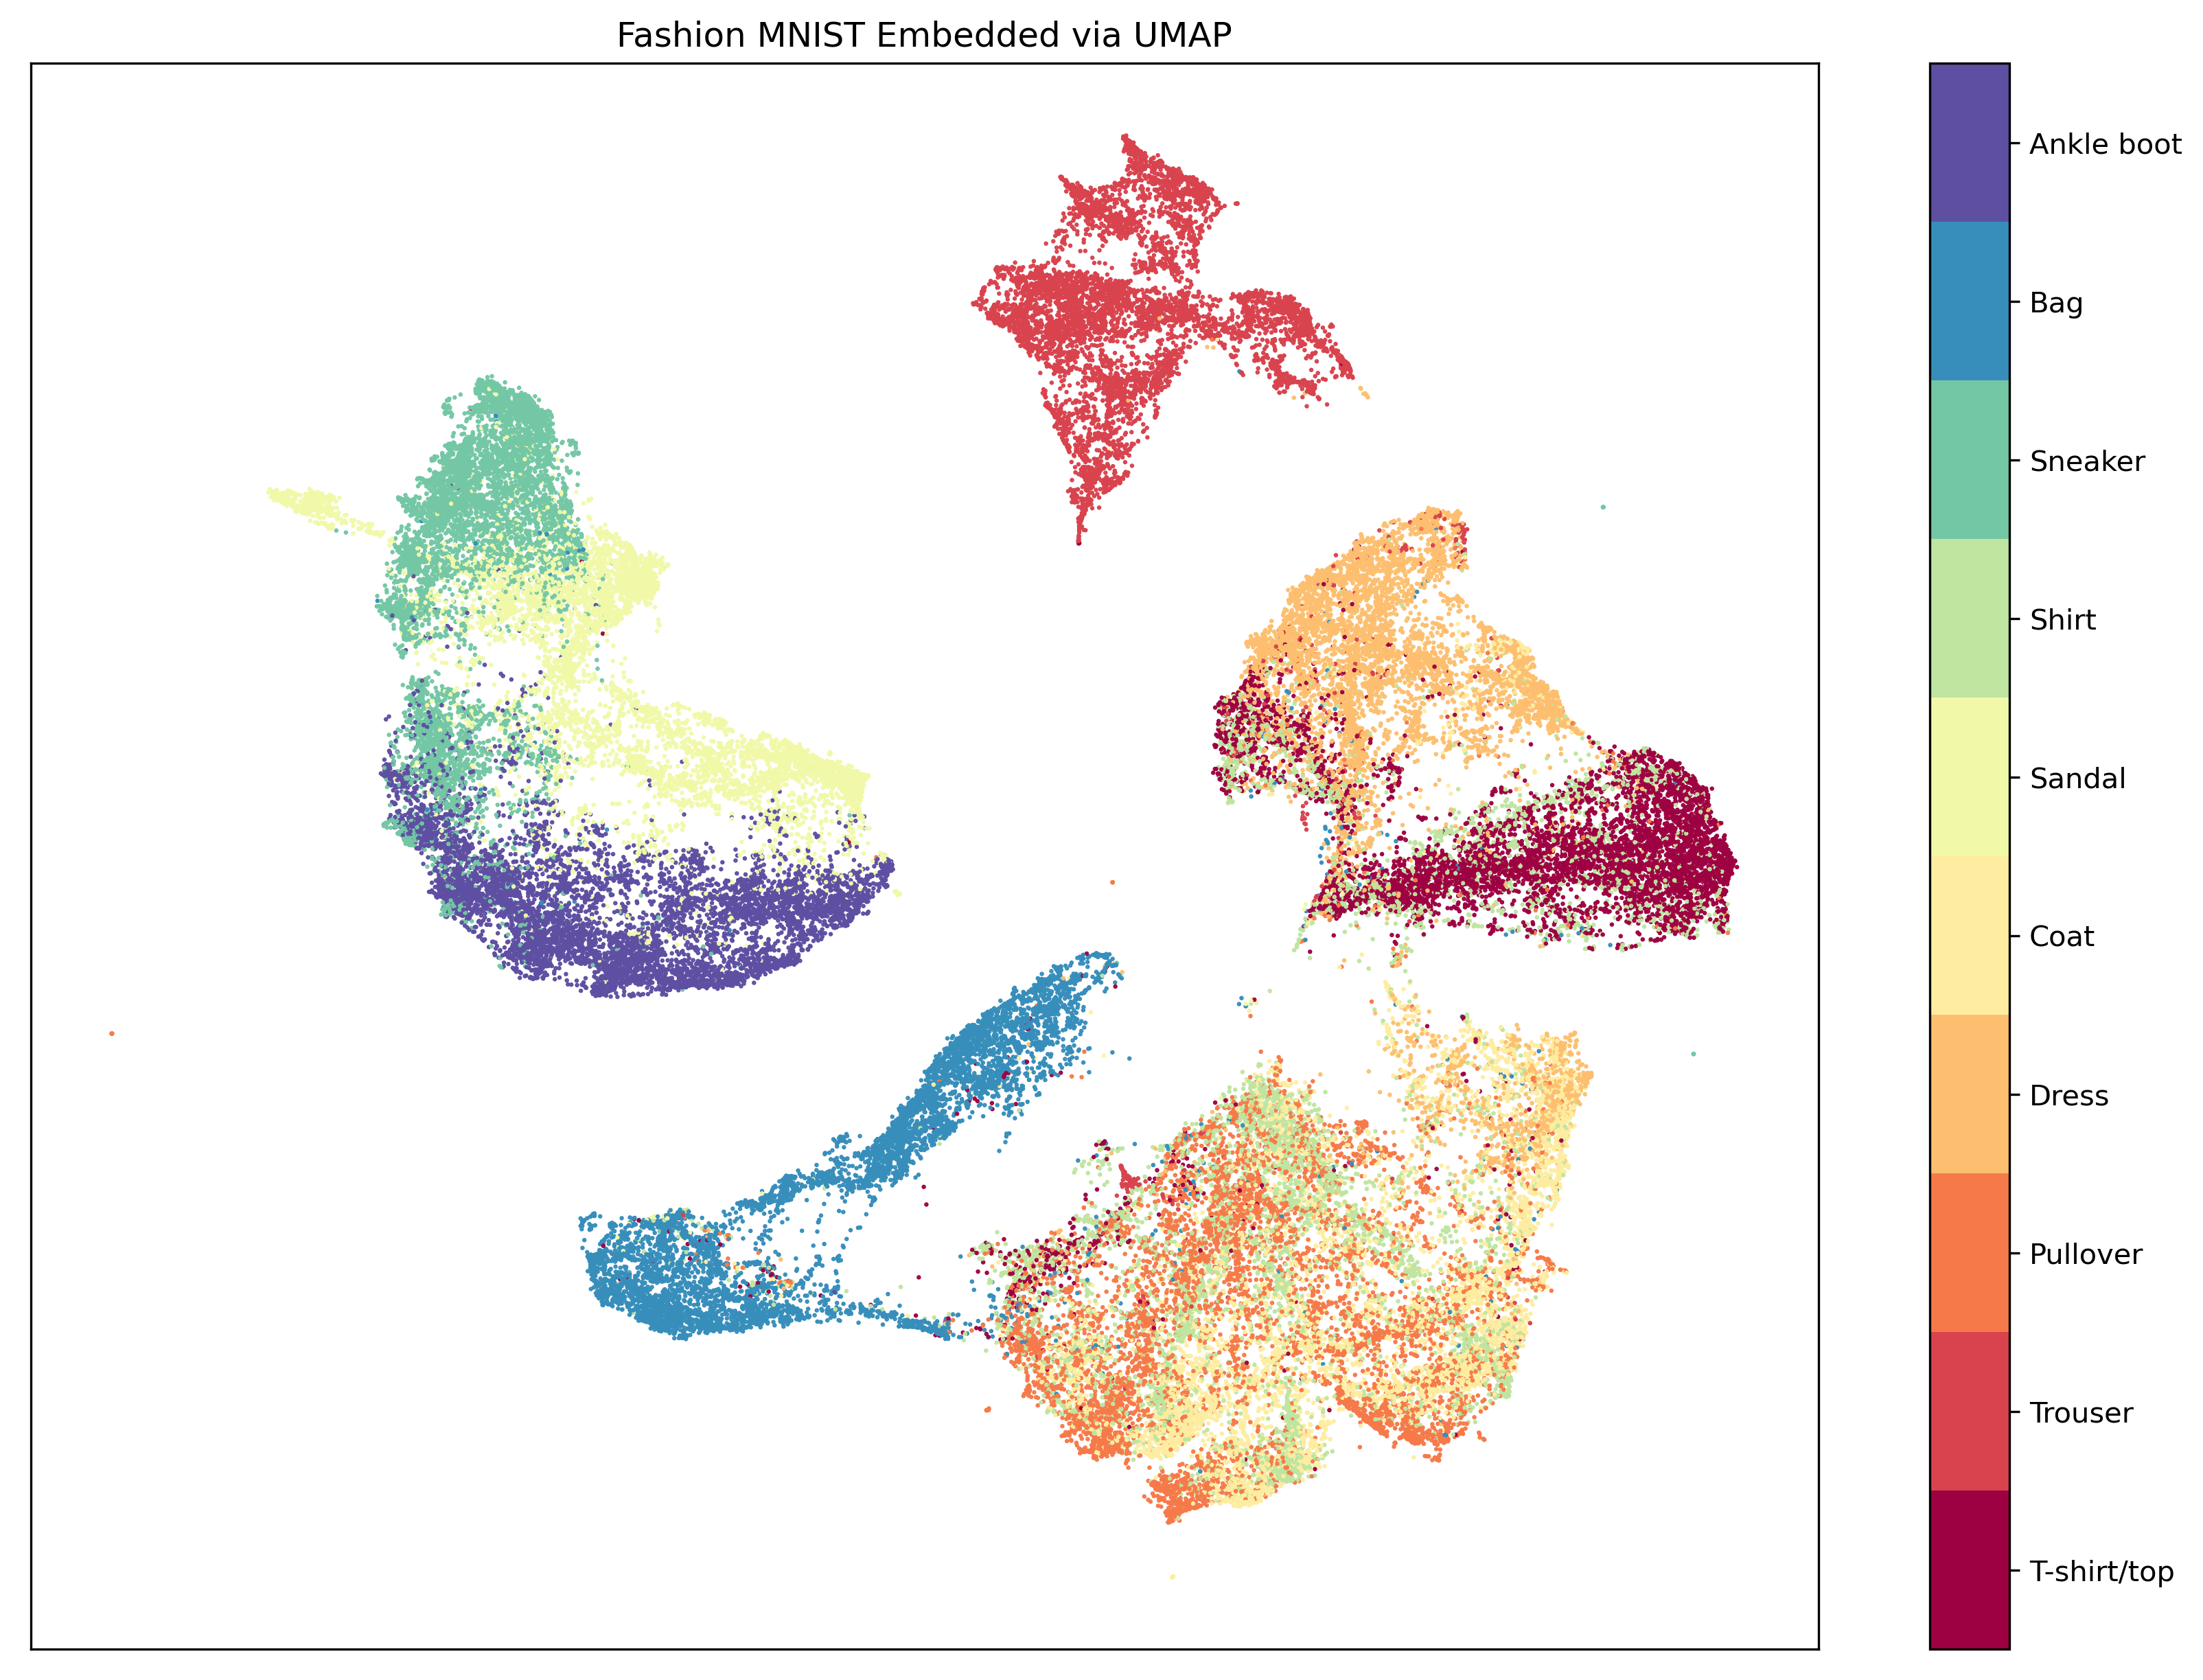

In [4]:
fig, ax = plt.subplots(1, figsize=(14, 10),dpi = 300)
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP');

### ↑This result is okay for unsupervised data. But still, some clusters are not seperated.
### ↓ Supervised Learning will solve this problem

CPU times: total: 25min 43s
Wall time: 58.1 s


Text(0.5, 1.0, 'Fashion MNIST Embedded via UMAP using Labels')

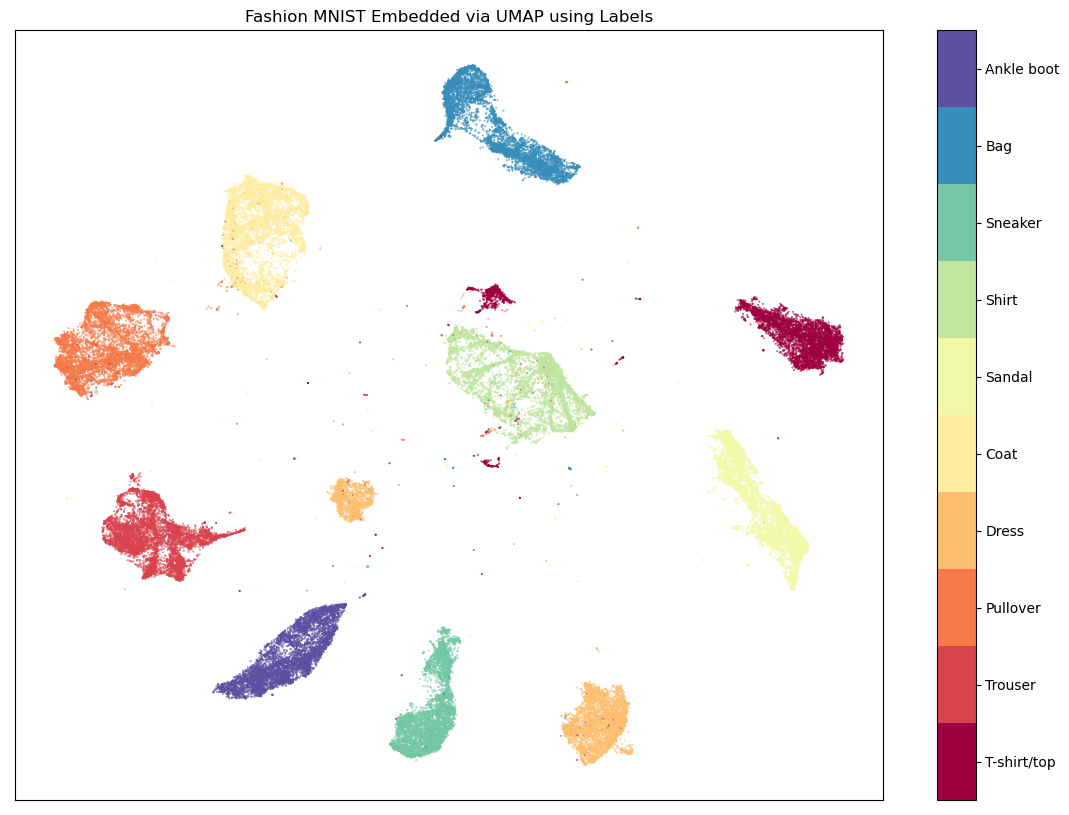

In [5]:
%%time
# remember, bigger n-neighbor is better for supervised learning.
embedding = umap.UMAP().fit_transform(data, y=target) # almost the same, just hand in y=target.
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');

#### Half supervised learning means that only part of the data have lable, in our data, it can indicate simutaneousa input of spon and stim data.

In [6]:
masked_target = target.copy().astype(np.int8)
masked_target[np.random.choice(70000, size=10000, replace=False)] = -1
# Null random 10000 labels. Replace them with -1.

In [13]:
%%time
# fit with masked data, this is a half supervised learning.
fitter = umap.UMAP().fit(data, y=masked_target)
embedding = fitter.embedding_

CPU times: total: 24min 43s
Wall time: 51 s


Text(0.5, 1.0, 'Fashion MNIST Embedded via UMAP using Partial Labels')

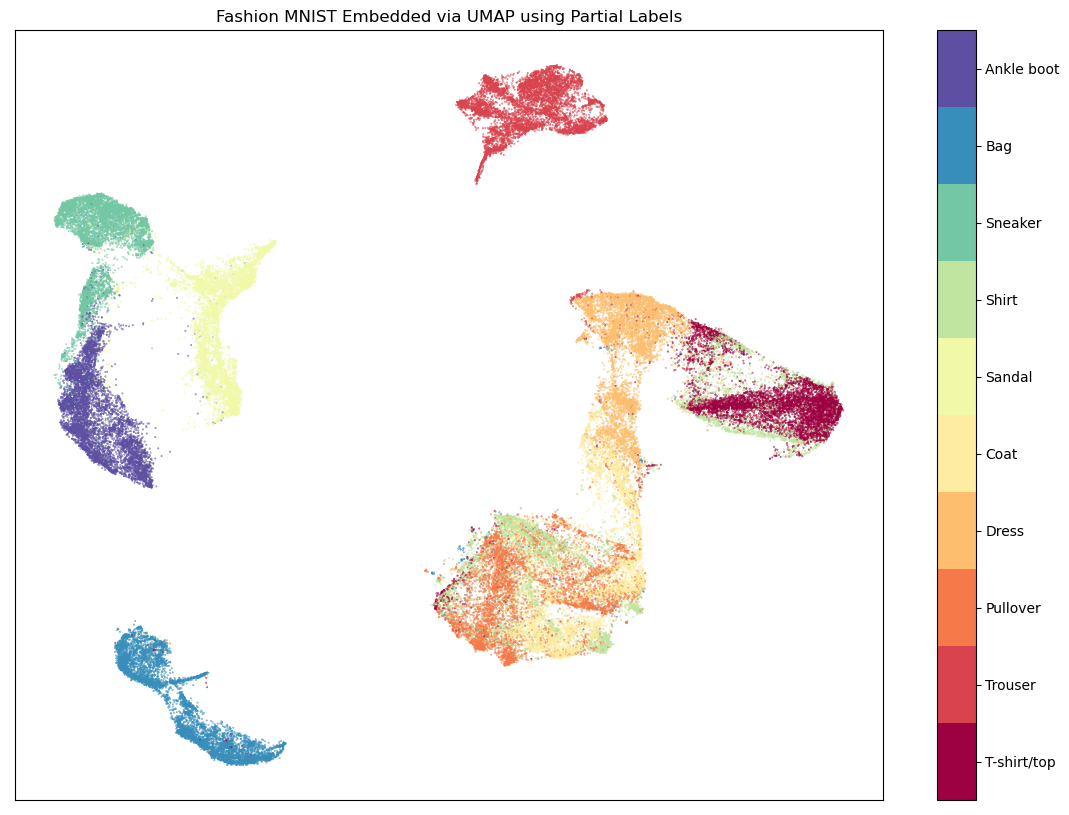

In [14]:
# plot half supervised learning data.
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Partial Labels')

### This can direct use for classification.
### Usage is the same as supervised learning. Train with labled data and plot spon

In [15]:
%%time
train_data = np.array(train)
test_data = np.array(test)
mapper = umap.UMAP(n_neighbors=10).fit(train_data, np.array(train_labels))# fit function accept input x,y as usual.

CPU times: total: 18min 24s
Wall time: 43.1 s


Manifold trained and saved in mapper. We can use ***mapper.transform*** to express new point on manifold.

In [16]:
%%time
# embed test data on trained manifold.
test_embedding = mapper.transform(test_data) # transform to put raw data on manifold space.

CPU times: total: 1min 22s
Wall time: 37.3 s


Text(0.5, 1.0, 'Fashion MNIST Train Digits Embedded via UMAP Transform')

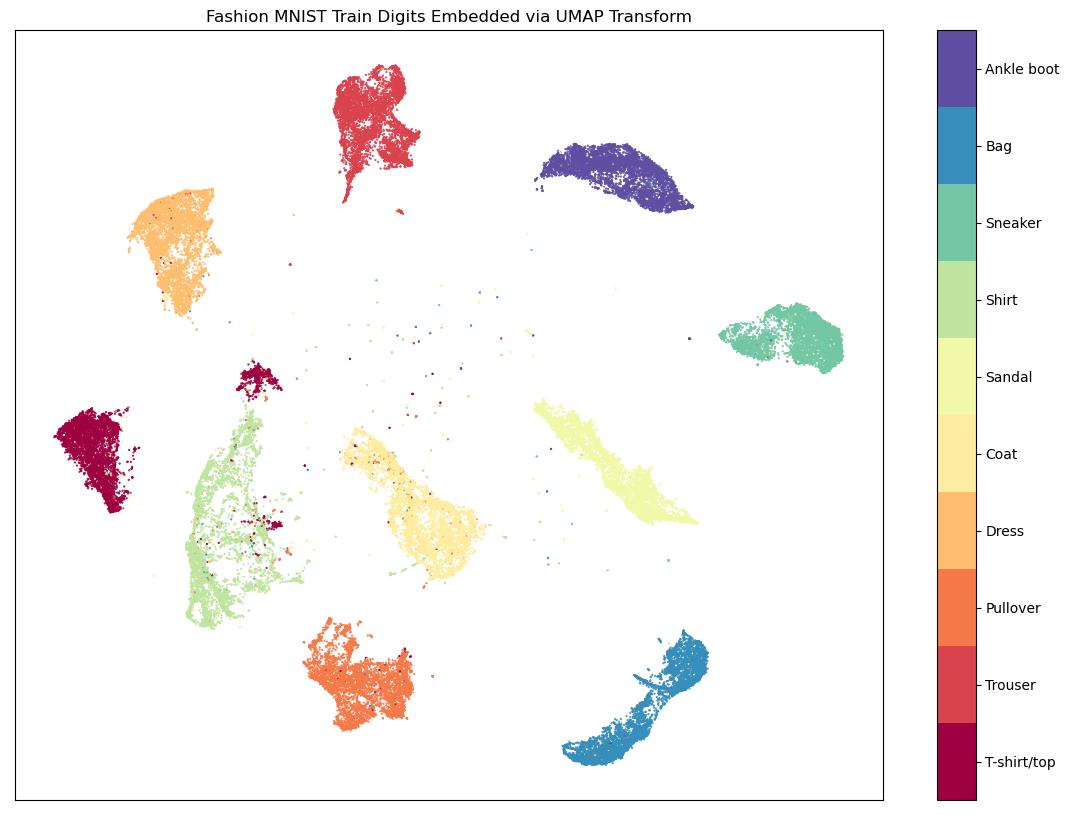

In [19]:
# show train data on manifold
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper.embedding_.T, s=0.3, c=np.array(train_labels), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Train Digits Embedded via UMAP Transform')

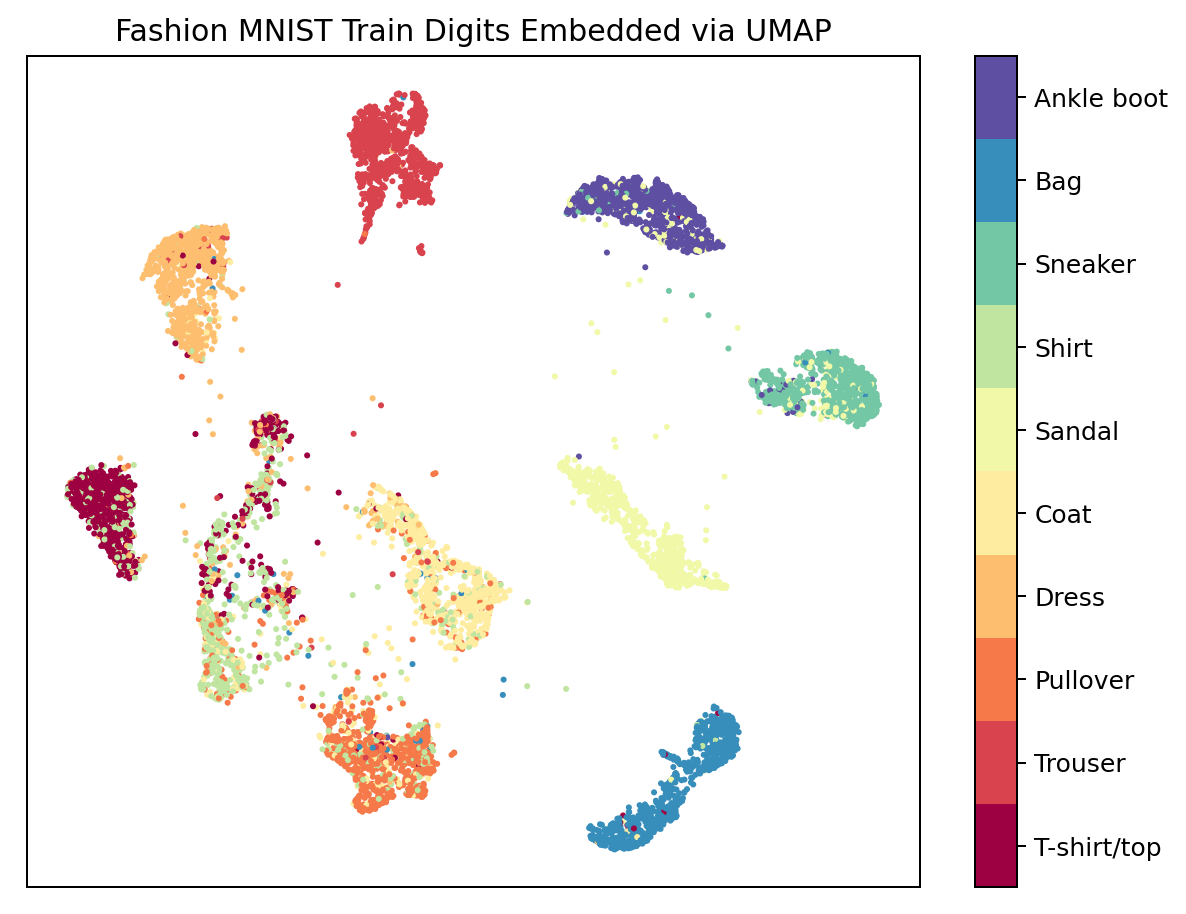

In [26]:
# on the same manifold, we can show test data either.
fig, ax = plt.subplots(1, figsize=(8, 6),dpi = 180)
plt.scatter(*test_embedding.T, s=2, c=np.array(test_labels), cmap='Spectral', alpha=1.0)# use label as color
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5) # place to put label bar on
cbar.set_ticks(np.arange(10)) #set tick of c, as we use 0-9 label number.
cbar.set_ticklabels(classes) # name of tick are predefined.
plt.title('Fashion MNIST Train Digits Embedded via UMAP'); # title of graph.

## Tired of FMNIST Data? Let's try some data harder.
#### Galaxy 10SDSS is a (very hard) data set of 10 types of galaxies. Supervised learning's advantage are easily found here.

In [2]:
# get default backend
import matplotlib
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import umap
import os
import math
import requests


with h5py.File("Galaxy10.h5", "r") as F:
    images = np.array(F["images"])
    labels = np.array(F["ans"])

X_train = np.empty([math.floor(len(labels) / 100), 14283], dtype=np.float64)
y_train = np.empty([math.floor(len(labels) / 100)], dtype=np.float64)
X_test = X_train
y_test = y_train

# Total data set have 21785 69*69(RGB) pixel galaxy data, we use a subset (1% of then as test:217 graph) as test.

Text(0.5, 1.0, 'Data Subset')

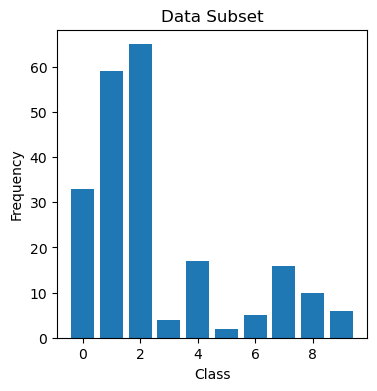

In [50]:
# Get a subset of the data
for i in range(math.floor(len(labels) / 100)):
    X_train[i, :] = np.array(np.ndarray.flatten(images[i, :, :, :]), dtype=np.float64)
    y_train[i] = labels[i]
    X_test[i, :] = np.array(
        np.ndarray.flatten(images[i + math.floor(len(labels) / 100), :, :, :]),
        dtype=np.float64,
    )
    y_test[i] = labels[i + math.floor(len(labels) / 100)]

# Plot distribution
classes, frequency = np.unique(y_train, return_counts=True)
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
plt.bar(classes, frequency)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data Subset")
# plt.savefig("galaxy10_subset.svg")

First, let's try as unsupervised learning.

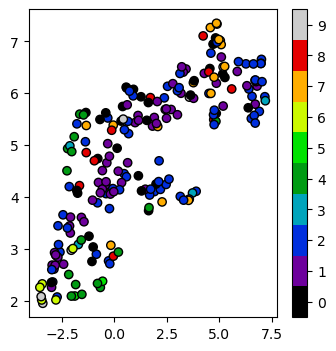

In [54]:
reducer = umap.UMAP(
    n_components=2, n_neighbors=5, random_state=42, transform_seed=42, verbose=False
)
reducer.fit(X_train)

galaxy10_umap = reducer.transform(X_train)
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
plt.scatter(
    galaxy10_umap[:, 0],
    galaxy10_umap[:, 1],
    c=y_train,
    cmap=plt.cm.nipy_spectral,
    edgecolor="k",
    label=y_train,
)
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.savefig("galaxy10_2D_umap.svg")

Supervised learning react a lot better

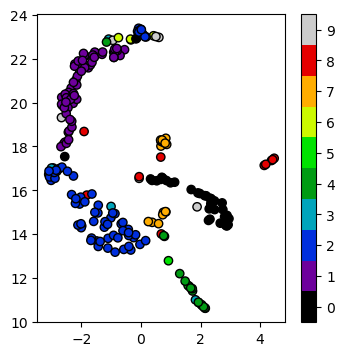

In [55]:
reducer = umap.UMAP(
    n_components=2, n_neighbors=15, random_state=42, transform_seed=42, verbose=False
)
reducer.fit(X_train, y_train)# the only difference. label of data is given.

galaxy10_umap_supervised = reducer.transform(X_train)
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
plt.scatter(
    galaxy10_umap_supervised[:, 0],
    galaxy10_umap_supervised[:, 1],
    c=y_train,
    cmap=plt.cm.nipy_spectral,
    edgecolor="k",
    label=y_train,
)
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.savefig("galaxy10_2D_umap_supervised.svg")

In [61]:
X_train.shape

(21785, 14283)

Text(0.5, 1.0, 'Data Subset')

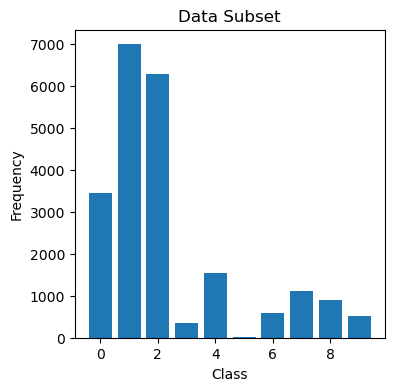

In [3]:
# put all data into manifold space.
X_train = np.empty([math.floor(len(labels) ), 14283], dtype=np.float64)
y_train = np.empty([math.floor(len(labels) )], dtype=np.float64)

for i in range(math.floor(len(labels))):
    X_train[i, :] = np.array(np.ndarray.flatten(images[i, :, :, :]), dtype=np.float64)
    y_train[i] = labels[i]


# Plot distribution
classes, frequency = np.unique(y_train, return_counts=True)
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
plt.bar(classes, frequency)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data Subset")

Train a manifold of all data supervised learning.


In [27]:
%%time
reducer = umap.UMAP(n_components=2, n_neighbors=5, random_state=42, transform_seed=42, verbose=False)
reducer.fit(X_train,y_train)


CPU times: total: 5min 36s
Wall time: 39.8 s


UMAP(n_neighbors=10, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

<AxesSubplot: >

<Figure size 640x480 with 0 Axes>

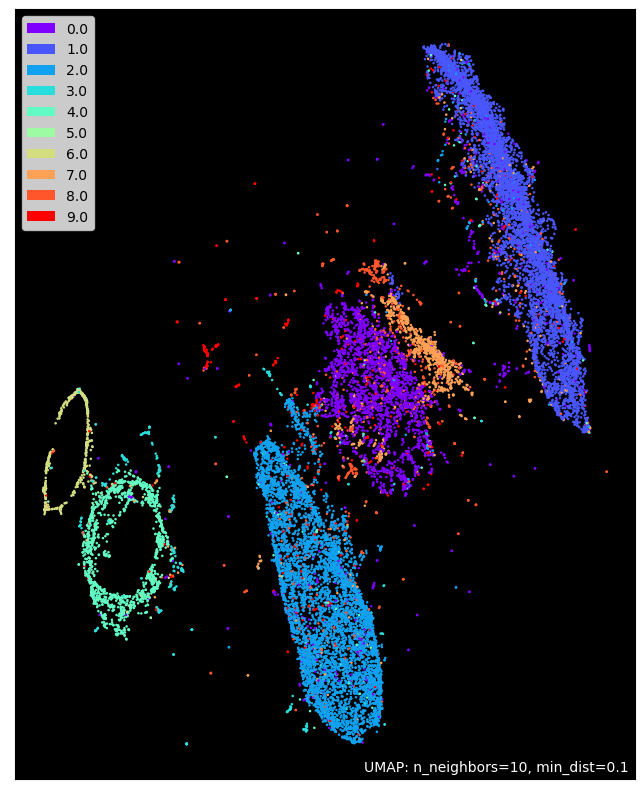

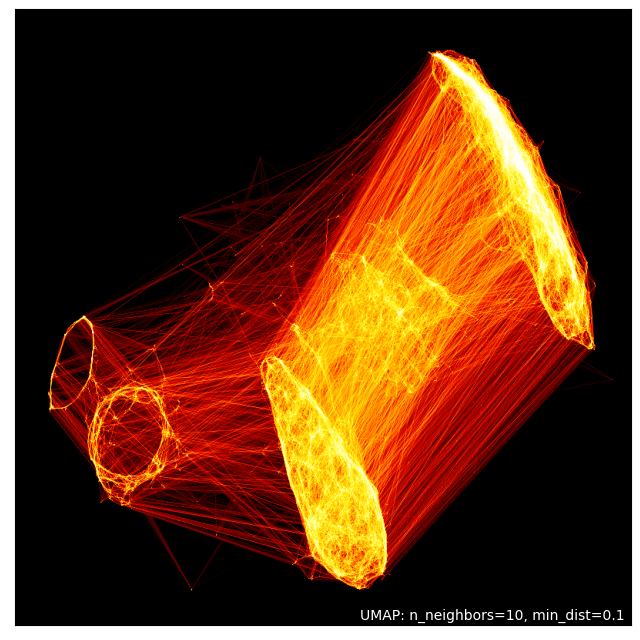

In [28]:
#2D plotter
import umap.plot
plt.clf()
# plt.switch_backend('TkAgg')
fig,ax = plt.subplots(1,figsize = (8,10))
umap.plot.points(reducer, labels=y_train, theme='fire',ax = ax)
umap.plot.connectivity(reducer, theme='fire')
# fig.show()


In [83]:
# 3D plotter
rep_3d = reducer.transform(X_train)
plt.clf()
plt.switch_backend('webAgg')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rep_3d[:,0], rep_3d[:,1], rep_3d[:,2], c=y_train,cmap = 'rainbow')
plt.show()